# Sección 7.8

EJERCICIO 3.

En 1929, Edwin Hubble examinó los datos que relacionan la velocidad radial v de 24 nebulosas galácticas con su distancia r de nuestra galaxia . Aunque hubo una dispersión considerable en los datos, los ajustó con una línea recta:

\begin{equation}
v=Hr
\end{equation}

Donde H se llama la constante de Hubble. 

La siguiente tabla contiene las distancias y velocidades utilizadas por Hubble.

<img src="metodos3.png"> 

En la tabla podemos observar la distancia vs. velocidad radial para 24 nebulosas extragalácticas.



a) Graficar los datos para verificar la adecuación de una relación lineal.

\begin{equation}
v(r)\simeq  a + Hr
\end{equation}



Primero procedimos a sacar los datos de la tabla y los guardamos en un archivo txt, esto con el objetivo de llamarlos para luego ser graficados

In [1]:
from numpy import loadtxt, log, sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
import numpy as np
from pylab import imshow, figure, title
from pylab import plot, show, legend, xlabel, ylabel, title, grid

In [12]:
data = loadtxt('Hubble.txt', comments="//") # abro el archivo donde está el valor de la distancia en la primera 
#columna  y el valor de la velocidad radial en la segunda columna


No handles with labels found to put in legend.


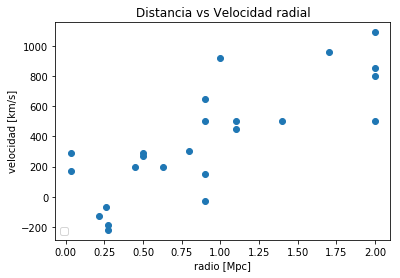

In [13]:
#creacion de posiciones para r y v

plt.plot(data[:,0], data[:,1], 'o')
legend(loc='lower left')
plt.title('Distancia vs Velocidad radial')
plt.xlabel('radio [Mpc]')
plt.ylabel('velocidad [km/s]')
plt.show()

En la grafica anterior (Distancia vs Velocidad radial) podemos observar que los datos son muy dispersos, por esta razon no seria muy adecuado una relación lineal.

b) Debido a que no recibe los errores para cada medición, puede suponer que la cifra menos significativa se ha redondeado y, por lo tanto, $σ ≥ 1$. O puede suponer que las mediciones astronómicas son difíciles de realizar y que hay al menos 10 % de errores en los datos.

c) Calcule un ajuste de línea recta de mínimos cuadrados a estos datos.

In [17]:
def Mincu(dat):
    n = len(dat[:,0])
    err = sqrt(n)
    
    s = 0
    sx = 0
    sy = 0
    sxx = 0
    sxy = 0
    delta = 0

    for i in range(n):
        s += 1/(err*err)
        sx += dat[i,0]
        sy += (dat[i,1])
        sxx += (dat[i,0]*dat[i,0] )   
        sxy += (dat[i,0]*(dat[i,1]) )
     
    
    sx /= (err*err)
    sy /= (err*err)
    sxx /= (err*err)
    sxy /= (err*err)

    delta = s*sxx - (sx*sx)
    
    vb=sxx/delta #varianza del intercepto
    vp=s/delta   #varianza de la pendiente

    b = (sxx*sy - sx*sxy) / delta  #intercepto
    p = (s*sxy - sx*sy) / delta    #pendiente
    
    return p,b,vp,vb

In [19]:
p,b,vp,vb=Mincu(data)

print("H=",p,"[km/s/mps]")
print("b=",b,)

Y = [(p*i+b) for i in data[:,0]]


H= 454.15844092262836 [km/s/mps]
b= -40.783649095860476


d) Trace su mejor $a + Hr$ en la curva con los datos.

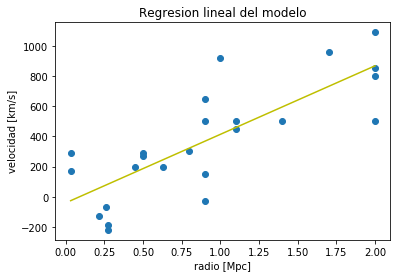

In [21]:
plt.plot(data[:,0], data[:,1], 'o', label="V(r)")
plt.plot(data[:,0], Y, 'y-', label="ajuste")
plt.title('Regresion lineal del modelo')
plt.xlabel('radio [Mpc]')
plt.ylabel('velocidad [km/s]')
plt.show()

e) Después de ajustar los datos, calcule la varianza y compárela con la desviación de su ajuste de los datos. Verifique que aproximadamente un tercio de los puntos pierdan la banda de error σ (eso es lo que se espera para una distribución normal de errores).

In [22]:
n=len(data[:,1])
v=0
for i in range (n): 
    v +=((data[i,1]-Y[i])**2)
v=v/(n-1)
print("varianza=",v)

varianza= 51888.79853357131


f) Use su varianza calculada para determinar el $\chi ^{2}$ del ajuste. Comenta sobre el valor obtenido.

In [28]:
zhi=0
for i in range (n): 
    zhi +=(((data[i,1]-Y[i]))/v)**2

print("X^2=",zhi)

X^2= 0.0004432555898383219


g) Determine las varianzas $\sigma _{a}$ y $\sigma _{b}$ y verifique si tiene sentido usarlas como errores en los valores deducidos para a y b.

In [30]:
print("varianza de p=", vp )
print("varianza de b=", vb )

varianza de p= 2.504359248142834
varianza de b= 3.0801317872097638


h) Ahora que tiene un ajuste, mire nuevamente los datos y calcule cuál podría ser un mejor valor para los errores en las ordenadas.